In [49]:

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from tqdm import tqdm
from sklearn.metrics import accuracy_score


In [50]:
def load_dataset(name=1):
    if name ==1 :
        data, label = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.75, random_state=42)
    elif name == 2:
        data, label = make_moons(n_samples=100, noise=0.05, random_state=42)
    elif name == 3:
        data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        label = np.array([[0,1, 1, 0]])
    label = label.reshape((-1,1))
    return data, label


In [51]:
def plot(data, label, model=None,h = 0.02, extend=0.1):
        
    x_min, x_max = data[:, 0].min() - extend, data[:, 0].max() +extend
    y_min, y_max = data[:, 1].min() - extend, data[:, 1].max() + extend
            
    plt.figure(1)
    plt.clf()
    if model:
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = model.predict_prob(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        plt.imshow(
            Z,
            interpolation="nearest",
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap="bwr",
            aspect="auto",
            origin="lower",
            alpha=0.5
        )

    plt.scatter(x[:, 0], x[:, 1], c=label, cmap='coolwarm')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

In [52]:
data, label = load_dataset(name=2)

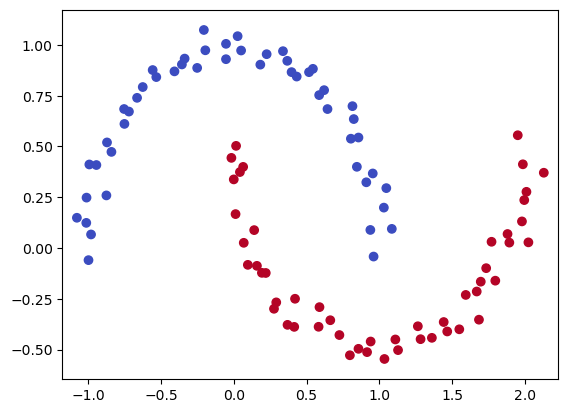

In [53]:
plot(data, label)

In [106]:
class sigmoid:
    def __call__(self, x):
        return 1/(1+np.exp(-x))
    def derivative(self, x):
        return x*(1-x)

class tanh:
    def __call__(self, x):
        return np.tanh(x)
    def derivative(self, x):
        return 1 - np.tanh(x)**2
class relu:
    def __call__(self, x):
        return np.maximum(0, x)
    def derivative(self, x):
        return np.where(x>0, 1, 0)

In [107]:
class Perseptron:
    def __init__(self, input_size,ouput_size, lr=0.01, activation=sigmoid(), random_seed=None):
        if random_seed:
            np.random.seed(random_seed)
        self.wight = np.random.rand(input_size, ouput_size)
        self.bias = np.random.rand()
        self.activation = activation
        self.lr = lr
        self.errors = np.array([])
        self.accuracy = np.array([])
        
    def forward(self, x):
        return self.activation(np.dot(x, self.wight)+self.bias)
    
    def backward(self, x, y, y_hat):
        error = (0.5 * ((y-y_hat)**2)).mean()
        derror = y_hat - y
        dpred = self.activation.derivative(y_hat)
        z_delta = derror * dpred
        self.wight -= (self.lr * np.dot(x.T, z_delta))
        self.bias -= (self.lr * np.sum(z_delta))

        return error
    
    def predict(self, x):
        y_hat = self.forward(x)
        return np.round(y_hat)
    def predict_prob(self, x):
        y_hat = self.forward(x)
        return y_hat
    def fit(self,x, y, epochs=1000, epsilon=1e-8):
        errors = []
        accuracy_list = []
        last_error = np.inf
        li = epochs//20
        c = 0
        for _ in tqdm(range(1,epochs+1)):
            
            y_hat = self.forward(x)
            error = self.backward(x, y, y_hat)
            errors.append(error)
            accuracy = accuracy_score(y, np.round(y_hat))
            accuracy_list.append(accuracy)
            if _ % li == 0:
                print(f'Epoch{_}, Error: {error:5}, Accuracy: {accuracy}')
            if np.abs(last_error - error) < epsilon:
                c +=1
            else:
                c = 0
            if  c >10 and _ > 10 :
                break
            last_error = error
        self.errors = np.concatenate((self.errors,errors))
        self.accuracy = np.concatenate((self.accuracy,accuracy_list))
        return errors
    def score(self, x, y):
        y_hat = self.forward(x)
        y_hat = np.round(y_hat)
        return accuracy_score(y, y_hat)

100%|██████████| 100/100 [00:00<00:00, 797.44it/s]


Epoch5, Error: 0.0640053622812609, Accuracy: 0.8
Epoch10, Error: 0.05326852912436683, Accuracy: 0.84
Epoch15, Error: 0.049176602559815305, Accuracy: 0.85
Epoch20, Error: 0.04703655248467233, Accuracy: 0.86
Epoch25, Error: 0.04578190132038836, Accuracy: 0.87
Epoch30, Error: 0.04498907076583479, Accuracy: 0.87
Epoch35, Error: 0.04445885850018822, Accuracy: 0.87
Epoch40, Error: 0.044088389254021816, Accuracy: 0.87
Epoch45, Error: 0.043820508783164805, Accuracy: 0.88
Epoch50, Error: 0.04362146520457673, Accuracy: 0.88
Epoch55, Error: 0.04347028476357427, Accuracy: 0.88
Epoch60, Error: 0.043353369804242245, Accuracy: 0.88
Epoch65, Error: 0.04326158717069088, Accuracy: 0.88
Epoch70, Error: 0.043188616989557144, Accuracy: 0.88
Epoch75, Error: 0.04312997410178767, Accuracy: 0.88
Epoch80, Error: 0.043082405664782976, Accuracy: 0.88
Epoch85, Error: 0.04304350790818167, Accuracy: 0.88
Epoch90, Error: 0.04301147521797774, Accuracy: 0.88
Epoch95, Error: 0.042984931671272625, Accuracy: 0.88
Epoch100

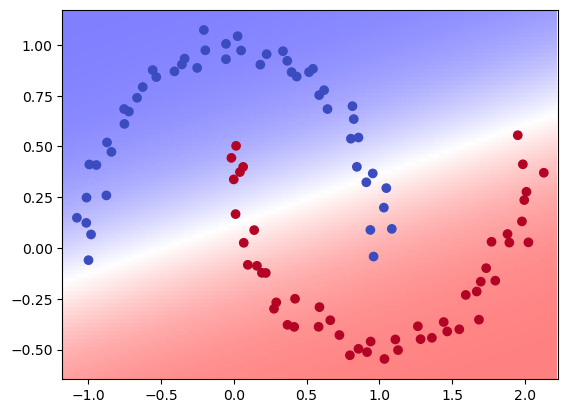

In [110]:

p = Perseptron(2, 1, lr=0.1, activation=sigmoid())

errors = p.fit(data, label, epochs=100)
print("Accuracy:",p.score(data, label))
plot(data, label, model=p)

100%|██████████| 100/100 [00:00<00:00, 933.48it/s]


Epoch5, Error: 0.11944981346024976, Accuracy: 0.56
Epoch10, Error: 0.07216576496381513, Accuracy: 0.74
Epoch15, Error: 0.05674616816195886, Accuracy: 0.81
Epoch20, Error: 0.05105361052369161, Accuracy: 0.84
Epoch25, Error: 0.04887505033496442, Accuracy: 0.85
Epoch30, Error: 0.04801320716811537, Accuracy: 0.87
Epoch35, Error: 0.04768213806987046, Accuracy: 0.87
Epoch40, Error: 0.04757520017112829, Accuracy: 0.87
Epoch45, Error: 0.04756335931290197, Accuracy: 0.87
Epoch50, Error: 0.047589616880086935, Accuracy: 0.87
Epoch55, Error: 0.047628299270685764, Accuracy: 0.86
Epoch60, Error: 0.047668017245292675, Accuracy: 0.86
Epoch65, Error: 0.047704068679016505, Accuracy: 0.86
Epoch70, Error: 0.047734893781589655, Accuracy: 0.86
Epoch75, Error: 0.047760371815224384, Accuracy: 0.86
Epoch80, Error: 0.04778099164904774, Accuracy: 0.86
Epoch85, Error: 0.047797449889121865, Accuracy: 0.86
Epoch90, Error: 0.04781046213695949, Accuracy: 0.86
Epoch95, Error: 0.047820681081592875, Accuracy: 0.86
Epoch

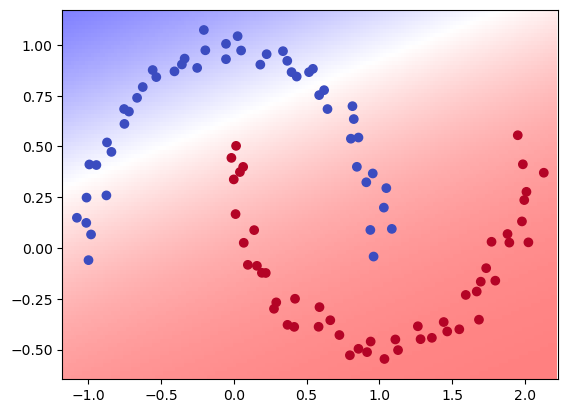

In [111]:

p2 = Perseptron(2, 1, lr=0.01, activation=tanh())

errors = p2.fit(data, label, epochs=100)
print("Accuracy:",p2.score(data, label))
plot(data, label, model=p2)

 70%|███████   | 70/100 [00:00<00:00, 921.37it/s]


Epoch5, Error: 0.12552361765869008, Accuracy: 0.6
Epoch10, Error: 0.06551620660059053, Accuracy: 0.78
Epoch15, Error: 0.04776312008886752, Accuracy: 0.85
Epoch20, Error: 0.04411527733796529, Accuracy: 0.86
Epoch25, Error: 0.04329563144650388, Accuracy: 0.88
Epoch30, Error: 0.04309338384586102, Accuracy: 0.88
Epoch35, Error: 0.04303917105301974, Accuracy: 0.88
Epoch40, Error: 0.04302440293637036, Accuracy: 0.88
Epoch45, Error: 0.04302020872810461, Accuracy: 0.88
Epoch50, Error: 0.04301900667922713, Accuracy: 0.88
Epoch55, Error: 0.043018662162445646, Accuracy: 0.88
Epoch60, Error: 0.04301856342104487, Accuracy: 0.88
Epoch65, Error: 0.04301853512092904, Accuracy: 0.88
Epoch70, Error: 0.043018527009877836, Accuracy: 0.88
Accuracy: 0.88


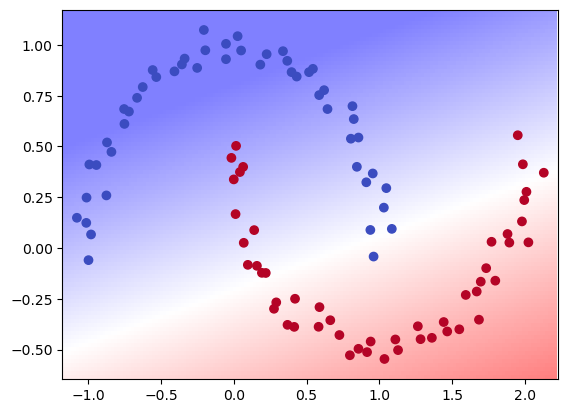

In [112]:

p3 = Perseptron(2, 1, lr=0.01, activation=relu())

errors = p3.fit(data, label, epochs=100)
print("Accuracy:",p3.score(data, label))

plot(data, label, model=p3)

# multi layer


In [113]:
class nerual_network:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01, activation=sigmoid(),random_seed=None ) -> None:
        if random_seed:
            np.random.seed(random_seed)
        layer = [input_size]+ hidden_size+ [output_size]
        self.init_layers(layer)
        
        self.lr = lr
        self.activation= activation
        self.errors = np.array([])
        self.accuracy = np.array([])
    def init_layers(self, layer):
        self.layer = []
        for i in range(len(layer)-1):
            self.layer.append(np.random.rand(layer[i], layer[i+1]))
    
    def forward(self, x):
        self.a = [x]
        for i in range(len(self.layer)):
            self.a.append(self.activation(np.dot(self.a[i], self.layer[i])))
        return self.a[-1]
    def predict(self, x):
        return self.predict_prob(x).round()
    
    def predict_prob(self, x):
        return self.forward(x)
    def backward(self, x, y, y_hat):
        error = (0.5 * ((y-y_hat)**2)).mean()
        derror = y_hat - y
        dpred = self.activation.derivative(y_hat)
        z_delta = derror * dpred
        self.layer[-1] -= (self.lr * np.dot(self.a[-2].T, z_delta))
        for i in range(len(self.layer)-2, -1, -1):
            z_delta = np.dot(z_delta, self.layer[i+1].T) * self.activation.derivative(self.a[i+1])
            self.layer[i] -= (self.lr * np.dot(self.a[i].T, z_delta))
        return error
    def fit(self,x, y, epochs=1000, epsilon=1e-8):
        errors = []
        accuracy_list = []
        last_error = np.inf
        li = epochs//20
        c = 0
        for _ in tqdm(range(1,epochs+1)):
            
            y_hat = self.forward(x)
            error = self.backward(x, y, y_hat)
            errors.append(error)
            accuracy = accuracy_score(y, np.round(y_hat))
            accuracy_list.append(accuracy)
            if _ % li == 0:
                print(f'Epoch{_}, Error: {error:5}, Accuracy: {accuracy}')
            if np.abs(last_error - error) < epsilon:
                c +=1
            else:
                c = 0
            if  c >10 and _ > 10 :
                break
                # print("stop")
            last_error = error
        self.errors = np.concatenate((self.errors,errors))
        self.accuracy = np.concatenate((self.accuracy,accuracy_list))
        return errors
    def score(self, x, y):
        y_hat = self.forward(x)
        y_hat = np.round(y_hat)
        return accuracy_score(y, y_hat)







In [114]:
def plot_loss(model):
    plt.plot(model.errors)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.xticks(range(0, len(model.errors), len(model.errors)//10))
    plt.show()  

  6%|▌         | 1768/30000 [00:01<00:21, 1287.03it/s]

Epoch1500, Error: 0.013279151340609904, Accuracy: 0.97


 11%|█         | 3171/30000 [00:02<00:18, 1461.23it/s]

Epoch3000, Error: 0.0007292516455960447, Accuracy: 1.0


 16%|█▌        | 4687/30000 [00:03<00:20, 1265.55it/s]

Epoch4500, Error: 0.0002796087654361403, Accuracy: 1.0


 21%|██        | 6176/30000 [00:04<00:23, 1033.27it/s]

Epoch6000, Error: 0.00016836653044664435, Accuracy: 1.0


 26%|██▌       | 7708/30000 [00:06<00:18, 1221.94it/s]

Epoch7500, Error: 0.00011830463980250785, Accuracy: 1.0


 31%|███       | 9258/30000 [00:07<00:15, 1357.28it/s]

Epoch9000, Error: 9.020921049557937e-05, Accuracy: 1.0


 35%|███▍      | 10380/30000 [00:08<00:15, 1273.68it/s]


Accuracy: 1.0


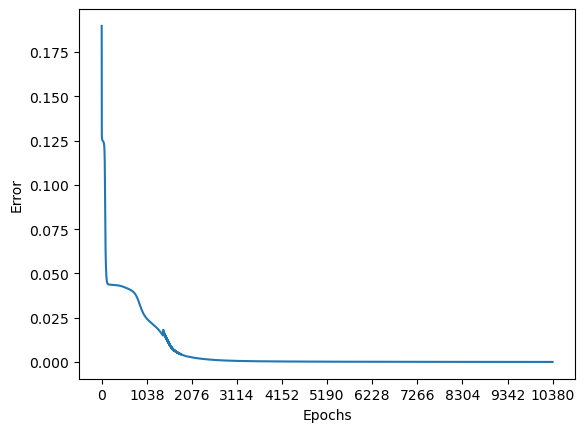

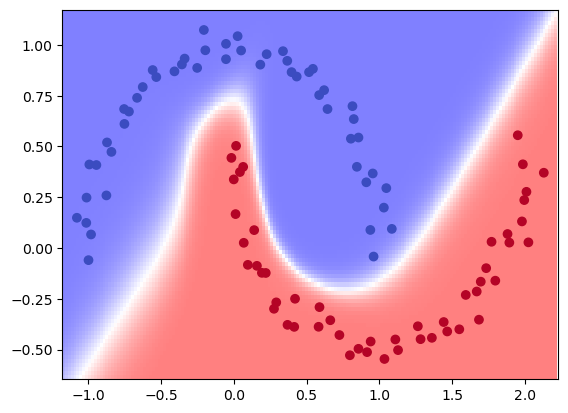

In [115]:

nn1 = nerual_network(2, [5,5], 1, lr=0.1, activation=sigmoid(), random_seed=42)

errors = nn1.fit(data, label, 30000)
print("Accuracy:",nn1.score(data, label))
plot_loss(nn1)
plot(data, label, model=nn1)

  6%|▌         | 1814/30000 [00:01<00:21, 1287.32it/s]

Epoch1500, Error: 0.13751609078546592, Accuracy: 0.46


 11%|█         | 3243/30000 [00:02<00:16, 1634.59it/s]

Epoch3000, Error: 0.12782134874285977, Accuracy: 0.49


 16%|█▌        | 4823/30000 [00:03<00:15, 1576.18it/s]

Epoch4500, Error: 0.09950003550424398, Accuracy: 0.75


 21%|██        | 6272/30000 [00:04<00:15, 1547.07it/s]

Epoch6000, Error: 0.08127965709183396, Accuracy: 0.8


 26%|██▌       | 7731/30000 [00:05<00:13, 1631.09it/s]

Epoch7500, Error: 0.0707230984524786, Accuracy: 0.84


 31%|███       | 9257/30000 [00:06<00:12, 1687.23it/s]

Epoch9000, Error: 0.06157731463531342, Accuracy: 0.85


 36%|███▌      | 10727/30000 [00:07<00:12, 1551.67it/s]

Epoch10500, Error: 0.05493349946815047, Accuracy: 0.87


 41%|████      | 12270/30000 [00:08<00:09, 1808.60it/s]

Epoch12000, Error: 0.05181202947790326, Accuracy: 0.86


 46%|████▌     | 13835/30000 [00:09<00:09, 1712.11it/s]

Epoch13500, Error: 0.052617075491791974, Accuracy: 0.87


 51%|█████     | 15193/30000 [00:10<00:08, 1646.63it/s]

Epoch15000, Error: 0.06129222758115475, Accuracy: 0.84


 56%|█████▌    | 16685/30000 [00:11<00:09, 1392.02it/s]

Epoch16500, Error: 0.08350683169101146, Accuracy: 0.72


 60%|██████    | 18147/30000 [00:12<00:07, 1663.06it/s]

Epoch18000, Error: 0.06905288645532519, Accuracy: 0.86


 66%|██████▌   | 19709/30000 [00:13<00:07, 1441.43it/s]

Epoch19500, Error: 0.03844884132867722, Accuracy: 0.95


 70%|███████   | 21108/30000 [00:14<00:09, 975.51it/s] 

Epoch21000, Error: 0.03385204073059982, Accuracy: 0.95


 76%|███████▌  | 22687/30000 [00:15<00:04, 1588.36it/s]

Epoch22500, Error: 0.031261543492732885, Accuracy: 0.97


 80%|████████  | 24142/30000 [00:16<00:04, 1452.02it/s]


Epoch24000, Error: 0.030206370619735027, Accuracy: 0.97
Accuracy: 0.97


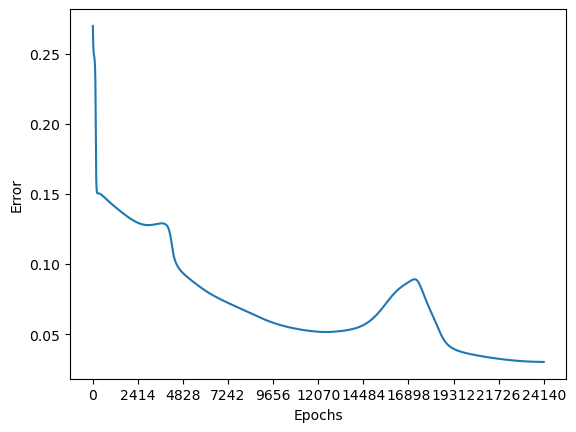

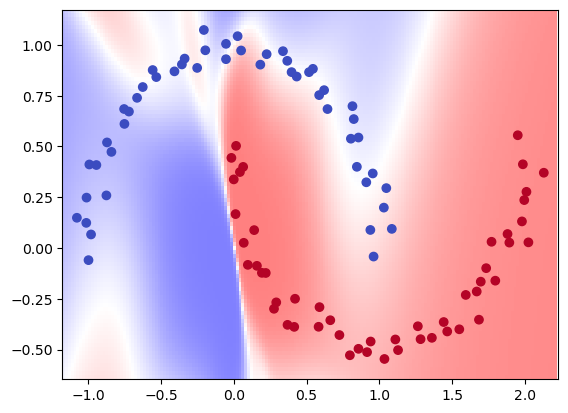

In [140]:

nn2 = nerual_network(2, [20,20], 1, lr=0.00015, activation=tanh(), random_seed=42)

errors = nn2.fit(data, label, 30000, epsilon=1e-8)
print("Accuracy:",nn2.score(data, label))
plot_loss(nn2)
plot(data, label, model=nn2)

  2%|▏         | 659/30000 [00:00<00:21, 1334.50it/s]


Accuracy: 0.84


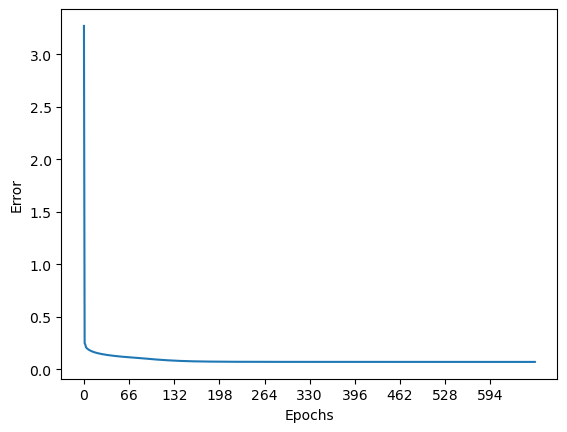

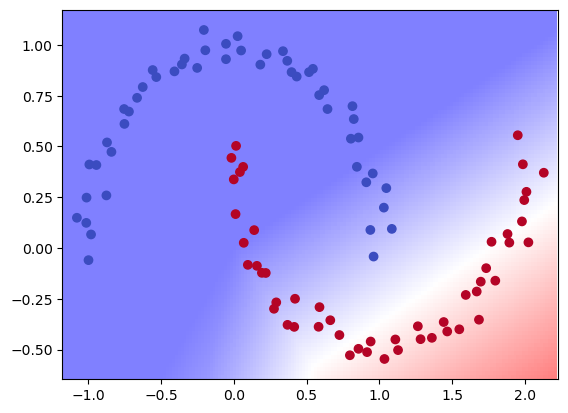

In [151]:

nn3 = nerual_network(2, [5,5], 1, lr=0.00139, activation=relu(), random_seed=42)

errors = nn3.fit(data, label, 30000)
print("Accuracy:",nn3.score(data, label))
plot_loss(nn3)
plot(data, label, model=nn3)